In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy import stats

# Set up read of csv file
netflix_path = "netflix_template.csv"

netflix_info = pd.read_csv(netflix_path)

# testing to ensure csv was read
netflix_info.head()

,show_id,type,title,director,cast,country,country.1,country.2,YEAR_added,release_year,rating,duration,TYPE1/listed_in,TYPE2,TYPE3,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,NaN,NaN,2020.0,2020,TV-MA,4 Seasons,International TV Shows,TV Dramas,TV Sci-Fi & Fantasy,In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,NaN,NaN,2016.0,2016,TV-MA,93 min,Dramas,International Movies,NaN,After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,NaN,NaN,2018.0,2011,R,78 min,Horror Movies,International Movies,NaN,"When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,NaN,NaN,2017.0,2009,PG-13,80 min,Action & Adventure,Independent Movies,Sci-Fi & Fantasy,"In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,NaN,NaN,2020.0,2008,PG-13,123 min,Dramas,NaN,NaN,A brilliant group of students become card-coun...


In [2]:
import seaborn as sns
# loc to find ratings and count on overall dataset
netflix_info_ratings = netflix_info['rating'].value_counts()
#netflix_info_ratings

In [3]:
# create DFs for each rating to be used later
netflix_info_tvma = netflix_info.loc[netflix_info["rating"]== 'TV-MA']
netflix_info_tvma = pd.DataFrame(netflix_info_tvma)

netflix_info_tv14 = netflix_info.loc[netflix_info["rating"]== 'TV-14']
netflix_info_tv14 = pd.DataFrame(netflix_info_tv14)

netflix_info_tvpg = netflix_info.loc[netflix_info["rating"]=='TV-PG']
netflix_info_tvpg =pd.DataFrame(netflix_info_tvpg)

netflix_info_r = netflix_info.loc[netflix_info["rating"]=='R']
netflix_info_r =pd.DataFrame(netflix_info_r)

netflix_info_pg13 = netflix_info.loc[netflix_info["rating"]=='PG-13']
netflix_info_pg13 =pd.DataFrame(netflix_info_pg13)

netflix_info_tvy = netflix_info.loc[netflix_info["rating"]=='TV-Y']
netflix_info_tvy =pd.DataFrame(netflix_info_tvy)

netflix_info_tvy7 = netflix_info.loc[netflix_info["rating"]=='TV-Y7']
netflix_info_tvy7 =pd.DataFrame(netflix_info_tvy7)

netflix_info_pg = netflix_info.loc[netflix_info["rating"]=='PG']
netflix_info_pg =pd.DataFrame(netflix_info_pg)

netflix_info_tvg = netflix_info.loc[netflix_info["rating"]=='TV-G']
netflix_info_tvg =pd.DataFrame(netflix_info_tvg)

netflix_info_nr = netflix_info.loc[netflix_info["rating"]=='NR']
netflix_info_nr =pd.DataFrame(netflix_info_nr)

netflix_info_g = netflix_info.loc[netflix_info["rating"]=='G']
netflix_info_g =pd.DataFrame(netflix_info_g)

netflix_info_tvy7fv = netflix_info.loc[netflix_info["rating"]=='TV-Y7-FV']
netflix_info_tvy7fv =pd.DataFrame(netflix_info_tvy7fv)

netflix_info_ur = netflix_info.loc[netflix_info["rating"]=='UR']
netflix_info_ur =pd.DataFrame(netflix_info_ur)

netflix_info_nc17 = netflix_info.loc[netflix_info["rating"]=='NC-17']
netflix_info_nc17 =pd.DataFrame(netflix_info_nc17)


In [4]:
# find percentage of each rating
percent_tvma = len(netflix_info_tvma) / len(netflix_info) *100
percent_tv14 = len(netflix_info_tv14) / len(netflix_info) *100
percent_tvpg = len(netflix_info_tvpg) / len(netflix_info) *100
percent_r = len(netflix_info_r) / len(netflix_info) *100
percent_pg13 = len(netflix_info_pg13) / len(netflix_info) *100
percent_tvy = len(netflix_info_tvy) / len(netflix_info) *100
percent_tvy7 = len(netflix_info_tvy7) / len(netflix_info) *100
percent_pg = len(netflix_info_pg) / len(netflix_info) *100
percent_tvg = len(netflix_info_tvg) / len(netflix_info) *100
percent_nr = len(netflix_info_nr) / len(netflix_info) *100
percent_g = len(netflix_info_g) / len(netflix_info) *100
percent_tvy7fv = len(netflix_info_tvy7fv) / len(netflix_info) *100
percent_ur = len(netflix_info_ur) / len(netflix_info) *100
percent_nc17 = len(netflix_info_nc17) / len(netflix_info) *100


percentage_ratings = pd.DataFrame({ 'Rating': ['TV-MA', 'TV-14', 'TV-PG', 'R', 'PG-13', 'TV-Y', 'TV-Y7', 'PG',
                                                     'TV-G', 'NR', 'G', 'TV-Y7-FV', 'UR', 'NC-17'],
                                          'Percentage': [percent_tvma, percent_tv14, percent_tvpg, percent_r, percent_pg13, percent_tvy, percent_tvy7,
                                                         percent_pg, percent_tvg, percent_nr, percent_g, percent_tvy7fv, percent_ur, percent_nc17]})
#percentage_ratings

In [5]:
values = percentage_ratings['Percentage']
labels = percentage_ratings['Rating']
#plt.pie(values,labels = labels,autopct='%1.1f%%',explode=(0.1,0,0,0,0,0,0,0,0,0,0,0,0,0))
#plt.title('Overall Ratings for Netflix')
#plt.legend(labels,loc=3)

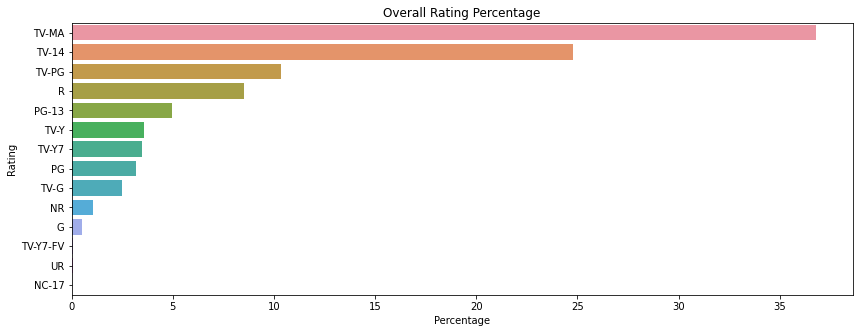

In [6]:
#create bar graph to show data comparison
plt.figure(figsize=(14,5))
g = sns.barplot(x=values, y=labels)
plt.title('Overall Rating Percentage')
plt.xlabel('Percentage')
plt.ylabel('Rating')
plt.savefig("images/overall_rating_percentages.png")
plt.show()


Breaking down 2014 info

In [7]:
# find info for items added in 2014
netflix_info_2014 = netflix_info.loc[netflix_info["YEAR_added"]==2014]
netflix_info_2014 = pd.DataFrame(netflix_info_2014)
#netflix_info_2014.head()


In [8]:
#Find overall count of ratings for 2014
netflix_info_2014_ratings = netflix_info_2014['rating'].value_counts()
#netflix_info_2014_ratings

In [9]:
# create DFs for each rating to be used later
netflix_info_2014_tvma = netflix_info_2014.loc[netflix_info_2014["rating"]== 'TV-MA']
netflix_info_2014_tvma = pd.DataFrame(netflix_info_2014_tvma)

netflix_info_2014_tvpg = netflix_info_2014.loc[netflix_info_2014["rating"]=='TV-PG']
netflix_info_2014_tvpg =pd.DataFrame(netflix_info_2014_tvpg)

netflix_info_2014_pg = netflix_info_2014.loc[netflix_info_2014["rating"]=='PG']
netflix_info_2014_pg =pd.DataFrame(netflix_info_2014_pg)

netflix_info_2014_tvy = netflix_info_2014.loc[netflix_info_2014["rating"]=='TV-Y']
netflix_info_2014_tvy =pd.DataFrame(netflix_info_2014_tvy)

netflix_info_2014_tv14 = netflix_info_2014.loc[netflix_info_2014["rating"]=='TV-14']
netflix_info_2014_tv14 =pd.DataFrame(netflix_info_2014_tv14)

netflix_info_2014_tvg = netflix_info_2014.loc[netflix_info_2014["rating"]=='TV-G']
netflix_info_2014_tvg =pd.DataFrame(netflix_info_2014_tvg)

netflix_info_2014_g = netflix_info_2014.loc[netflix_info_2014["rating"]=='G']
netflix_info_2014_g =pd.DataFrame(netflix_info_2014_g)


In [10]:
# find percentage of each rating
percent_tvma_2014 = len(netflix_info_2014_tvma) / len(netflix_info_2014) *100
percent_tvpg_2014 = len(netflix_info_2014_tvpg) / len(netflix_info_2014) *100
percent_pg_2014 = len(netflix_info_2014_pg) / len(netflix_info_2014) *100
percent_tvy_2014 = len(netflix_info_2014_tvy) / len(netflix_info_2014) *100
percent_tv14_2014 = len(netflix_info_2014_tv14) / len(netflix_info_2014) *100
percent_tvg_2014 = len(netflix_info_2014_tvg) / len(netflix_info_2014) *100
percent_g_2014 = len(netflix_info_2014_g) / len(netflix_info_2014) *100

percentage_2014_ratings = pd.DataFrame({ 'Rating': ['TV-MA', 'TV-PG', 'PG', 'TV-Y', 'TV-14', 'TV-G', 'G'],
                                          'Percentage': [percent_tvma_2014, percent_tvpg_2014, percent_pg_2014, percent_tvy_2014,
                                                       percent_tv14_2014, percent_tvg_2014, percent_g_2014]})           
#percentage_2014_ratings

In [11]:
#plt.pie(percentages_2014_ratings['Percentage'],labels = percentages_2014_ratings['Rating'],autopct='%1.1f%%',explode=(0.1,0,0,0,0,0,0))
#plt.title('Ratings for 2014')


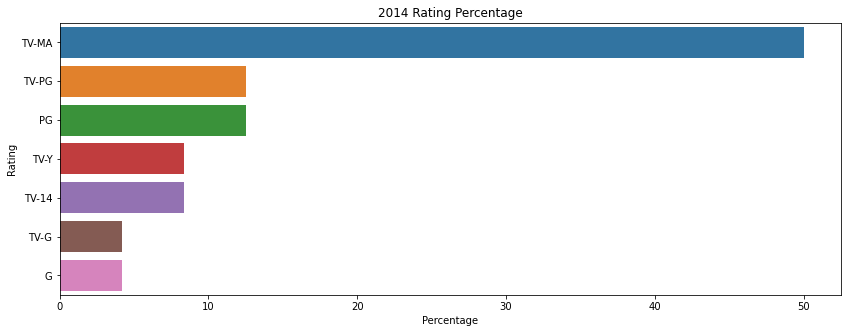

In [12]:
#create bar graph to show data comparison
values = percentage_2014_ratings['Percentage']
labels = percentage_2014_ratings['Rating']

plt.figure(figsize=(14,5))
g = sns.barplot(x=values, y=labels)
plt.title('2014 Rating Percentage')
plt.xlabel('Percentage')
plt.ylabel('Rating')
plt.savefig("images/2014_rating_percentages.png")
plt.show()

Breaking down 2015 info

In [13]:
# find info for items added in 2015
netflix_info_2015 = netflix_info.loc[netflix_info["YEAR_added"]==2015]
netflix_info_2015 = pd.DataFrame(netflix_info_2015)
#netflix_info_2015.head()

In [14]:
#Find overall count of ratings for 2015
netflix_info_2015_ratings = netflix_info_2015['rating'].value_counts()
#netflix_info_2015_ratings

In [15]:
netflix_info_2015_tvma = netflix_info_2015.loc[netflix_info_2015["rating"]== 'TV-MA']
netflix_info_2015_tvma = pd.DataFrame(netflix_info_2015_tvma)

netflix_info_2015_tv14 = netflix_info_2015.loc[netflix_info_2015["rating"]== 'TV-14']
netflix_info_2015_tv14 = pd.DataFrame(netflix_info_2015_tv14)

netflix_info_2015_tvpg = netflix_info_2015.loc[netflix_info_2015["rating"]=='TV-PG']
netflix_info_2015_tvpg =pd.DataFrame(netflix_info_2015_tvpg)

netflix_info_2015_r = netflix_info_2015.loc[netflix_info_2015["rating"]=='R']
netflix_info_2015_r =pd.DataFrame(netflix_info_2015_r)

netflix_info_2015_pg13 = netflix_info_2015.loc[netflix_info_2015["rating"]=='PG-13']
netflix_info_2015_pg13 =pd.DataFrame(netflix_info_2015_pg13)

netflix_info_2015_tvy = netflix_info_2015.loc[netflix_info_2015["rating"]=='TV-Y']
netflix_info_2015_tvy =pd.DataFrame(netflix_info_2015_tvy)

netflix_info_2015_tvy7 = netflix_info_2015.loc[netflix_info_2015["rating"]=='TV-Y7']
netflix_info_2015_tvy7 =pd.DataFrame(netflix_info_2015_tvy7)

netflix_info_2015_pg = netflix_info_2015.loc[netflix_info_2015["rating"]=='PG']
netflix_info_2015_pg =pd.DataFrame(netflix_info_2015_pg)

netflix_info_2015_tvg = netflix_info_2015.loc[netflix_info_2015["rating"]=='TV-G']
netflix_info_2015_tvg =pd.DataFrame(netflix_info_2015_tvg)

netflix_info_2015_nr = netflix_info_2015.loc[netflix_info_2015["rating"]=='NR']
netflix_info_2015_nr =pd.DataFrame(netflix_info_2015_nr)

netflix_info_2015_g = netflix_info_2015.loc[netflix_info_2015["rating"]=='G']
netflix_info_2015_g =pd.DataFrame(netflix_info_2015_g)

netflix_info_2015_tvy7fv = netflix_info_2015.loc[netflix_info_2015["rating"]=='TV-Y7-FV']
netflix_info_2015_tvy7fv =pd.DataFrame(netflix_info_2015_tvy7fv)

netflix_info_2015_ur = netflix_info_2015.loc[netflix_info_2015["rating"]=='UR']
netflix_info_2015_ur =pd.DataFrame(netflix_info_2015_ur)

netflix_info_2015_nc17 = netflix_info_2015.loc[netflix_info_2015["rating"]=='NC-17']
netflix_info_2015_nc17 =pd.DataFrame(netflix_info_2015_nc17)


In [16]:
# find percentage of each rating
percent_tvma_2015 = len(netflix_info_2015_tvma) / len(netflix_info_2015) *100
percent_tv14_2015 = len(netflix_info_2015_tv14) / len(netflix_info_2015) *100
percent_tvpg_2015 = len(netflix_info_2015_tvpg) / len(netflix_info_2015) *100
percent_r_2015 = len(netflix_info_2015_r) / len(netflix_info_2015) *100
percent_pg13_2015 = len(netflix_info_2015_pg13) / len(netflix_info_2015) *100
percent_tvy_2015 = len(netflix_info_2015_tvy) / len(netflix_info_2015) *100
percent_tvy7_2015 = len(netflix_info_2015_tvy7) / len(netflix_info_2015) *100
percent_pg_2015 = len(netflix_info_2015_pg) / len(netflix_info_2015) *100
percent_tvg_2015 = len(netflix_info_2015_tvg) / len(netflix_info_2015) *100
percent_nr_2015 = len(netflix_info_2015_nr) / len(netflix_info_2015) *100
percent_g_2015= len(netflix_info_2015_g) / len(netflix_info_2015) *100
percent_tvy7fv_2015 = len(netflix_info_2015_tvy7fv) / len(netflix_info_2015) *100
percent_ur_2015 = len(netflix_info_2015_ur) / len(netflix_info_2015) *100
percent_nc17_2015 = len(netflix_info_2015_nc17) / len(netflix_info_2015) *100


percentage_ratings_2015 = pd.DataFrame({ 'Rating': ['TV-MA', 'TV-14', 'TV-PG', 'R', 'PG-13', 'TV-Y', 'TV-Y7', 'PG',
                                                     'TV-G', 'NR', 'G', 'TV-Y7-FV', 'UR', 'NC-17'],
                                          'Percentage': [percent_tvma_2015, percent_tv14_2015, percent_tvpg_2015, percent_r_2015, percent_pg13_2015,
                                                         percent_tvy_2015, percent_tvy7_2015, percent_pg_2015, percent_tvg_2015, percent_nr_2015,
                                                         percent_g_2015, percent_tvy7fv_2015, percent_ur_2015, percent_nc17_2015]})
#percentage_ratings_2015

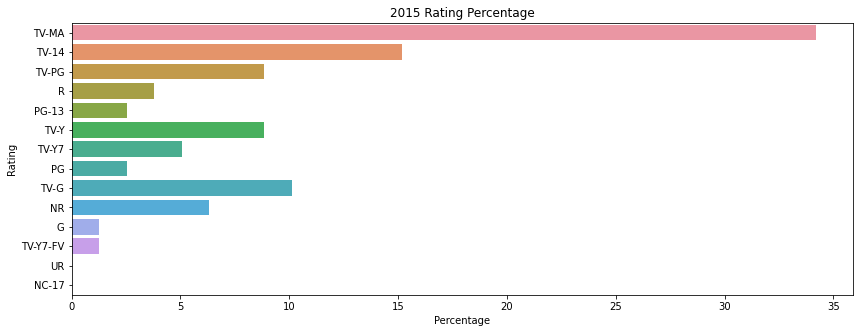

In [17]:
#create bar graph to show data comparison
values = percentage_ratings_2015['Percentage']
labels = percentage_ratings_2015['Rating']

plt.figure(figsize=(14,5))
g = sns.barplot(x=values, y=labels)
plt.title('2015 Rating Percentage')
plt.xlabel('Percentage')
plt.ylabel('Rating')
plt.savefig("images/2015_rating_percentages.png")
plt.show()

Breaking down 2016 info

In [18]:
# find info for items added in 2016
netflix_info_2016 = netflix_info.loc[netflix_info["YEAR_added"]==2016]
netflix_info_2016 = pd.DataFrame(netflix_info_2016)
#netflix_info_2016.head()

In [19]:
#Find overall count of ratings for 2016
netflix_info_2016_ratings = netflix_info_2016['rating'].value_counts()
#netflix_info_2016_ratings

In [20]:
netflix_info_2016_tvma = netflix_info_2016.loc[netflix_info_2016["rating"]== 'TV-MA']
netflix_info_2016_tvma = pd.DataFrame(netflix_info_2016_tvma)

netflix_info_2016_tv14 = netflix_info_2016.loc[netflix_info_2016["rating"]== 'TV-14']
netflix_info_2016_tv14 = pd.DataFrame(netflix_info_2016_tv14)

netflix_info_2016_tvpg = netflix_info_2016.loc[netflix_info_2016["rating"]=='TV-PG']
netflix_info_2016_tvpg =pd.DataFrame(netflix_info_2016_tvpg)

netflix_info_2016_r = netflix_info_2016.loc[netflix_info_2016["rating"]=='R']
netflix_info_2016_r =pd.DataFrame(netflix_info_2016_r)

netflix_info_2016_pg13 = netflix_info_2016.loc[netflix_info_2016["rating"]=='PG-13']
netflix_info_2016_pg13 =pd.DataFrame(netflix_info_2016_pg13)

netflix_info_2016_tvy = netflix_info_2016.loc[netflix_info_2016["rating"]=='TV-Y']
netflix_info_2016_tvy =pd.DataFrame(netflix_info_2016_tvy)

netflix_info_2016_tvy7 = netflix_info_2016.loc[netflix_info_2016["rating"]=='TV-Y7']
netflix_info_2016_tvy7 =pd.DataFrame(netflix_info_2016_tvy7)

netflix_info_2016_pg = netflix_info_2016.loc[netflix_info_2016["rating"]=='PG']
netflix_info_2016_pg =pd.DataFrame(netflix_info_2016_pg)

netflix_info_2016_tvg = netflix_info_2016.loc[netflix_info_2016["rating"]=='TV-G']
netflix_info_2016_tvg =pd.DataFrame(netflix_info_2016_tvg)

netflix_info_2016_nr = netflix_info_2016.loc[netflix_info_2016["rating"]=='NR']
netflix_info_2016_nr =pd.DataFrame(netflix_info_2016_nr)

netflix_info_2016_g = netflix_info_2016.loc[netflix_info_2016["rating"]=='G']
netflix_info_2016_g =pd.DataFrame(netflix_info_2016_g)

netflix_info_2016_tvy7fv = netflix_info_2016.loc[netflix_info_2016["rating"]=='TV-Y7-FV']
netflix_info_2016_tvy7fv =pd.DataFrame(netflix_info_2016_tvy7fv)

netflix_info_2016_ur = netflix_info_2016.loc[netflix_info_2016["rating"]=='UR']
netflix_info_2016_ur =pd.DataFrame(netflix_info_2016_ur)

netflix_info_2016_nc17 = netflix_info_2016.loc[netflix_info_2016["rating"]=='NC-17']
netflix_info_2016_nc17 =pd.DataFrame(netflix_info_2016_nc17)


In [21]:
# find percentage of each rating
percent_tvma_2016 = len(netflix_info_2016_tvma) / len(netflix_info_2016) *100
percent_tv14_2016 = len(netflix_info_2016_tv14) / len(netflix_info_2016) *100
percent_tvpg_2016 = len(netflix_info_2016_tvpg) / len(netflix_info_2016) *100
percent_r_2016 = len(netflix_info_2016_r) / len(netflix_info_2016) *100
percent_pg13_2016 = len(netflix_info_2016_pg13) / len(netflix_info_2016) *100
percent_tvy_2016 = len(netflix_info_2016_tvy) / len(netflix_info_2016) *100
percent_tvy7_2016 = len(netflix_info_2016_tvy7) / len(netflix_info_2016) *100
percent_pg_2016 = len(netflix_info_2016_pg) / len(netflix_info_2016) *100
percent_tvg_2016 = len(netflix_info_2016_tvg) / len(netflix_info_2016) *100
percent_nr_2016 = len(netflix_info_2016_nr) / len(netflix_info_2016) *100
percent_g_2016= len(netflix_info_2016_g) / len(netflix_info_2016) *100
percent_tvy7fv_2016 = len(netflix_info_2016_tvy7fv) / len(netflix_info_2016) *100
percent_ur_2016 = len(netflix_info_2016_ur) / len(netflix_info_2016) *100
percent_nc17_2016 = len(netflix_info_2016_nc17) / len(netflix_info_2016) *100


percentage_ratings_2016 = pd.DataFrame({ 'Rating': ['TV-MA', 'TV-14', 'TV-PG', 'R', 'PG-13', 'TV-Y', 'TV-Y7', 'PG',
                                                     'TV-G', 'NR', 'G', 'TV-Y7-FV', 'UR', 'NC-17'],
                                          'Percentage': [percent_tvma_2016, percent_tv14_2016, percent_tvpg_2016, percent_r_2016, percent_pg13_2016,
                                                         percent_tvy_2016, percent_tvy7_2016, percent_pg_2016, percent_tvg_2016, percent_nr_2016,
                                                         percent_g_2016, percent_tvy7fv_2016, percent_ur_2016, percent_nc17_2016]})
#percentage_ratings_2015

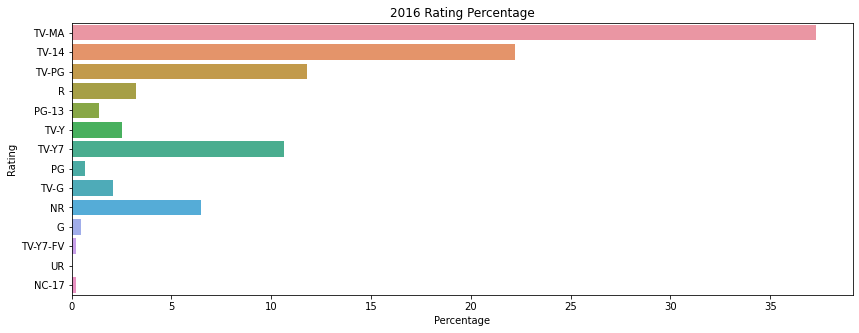

In [22]:
#create bar graph to show data comparison
values = percentage_ratings_2016['Percentage']
labels = percentage_ratings_2016['Rating']

plt.figure(figsize=(14,5))
g = sns.barplot(x=values, y=labels)
plt.title('2016 Rating Percentage')
plt.xlabel('Percentage')
plt.ylabel('Rating')
plt.savefig("images/2016_rating_percentages.png")
plt.show()

Breaking down 2017

In [23]:
# find info for items added in 2017
netflix_info_2017 = netflix_info.loc[netflix_info["YEAR_added"]==2017]
netflix_info_2017 = pd.DataFrame(netflix_info_2017)
#netflix_info_2017.head()

In [24]:
#Find overall count of ratings for 2017
netflix_info_2017_ratings = netflix_info_2017['rating'].value_counts()
#netflix_info_2017_ratings

In [25]:
netflix_info_2017_tvma = netflix_info_2017.loc[netflix_info_2017["rating"]== 'TV-MA']
netflix_info_2017_tvma = pd.DataFrame(netflix_info_2017_tvma)

netflix_info_2017_tv14 = netflix_info_2017.loc[netflix_info_2017["rating"]== 'TV-14']
netflix_info_2017_tv14 = pd.DataFrame(netflix_info_2017_tv14)

netflix_info_2017_tvpg = netflix_info_2017.loc[netflix_info_2017["rating"]=='TV-PG']
netflix_info_2017_tvpg =pd.DataFrame(netflix_info_2017_tvpg)

netflix_info_2017_r = netflix_info_2017.loc[netflix_info_2017["rating"]=='R']
netflix_info_2017_r =pd.DataFrame(netflix_info_2017_r)

netflix_info_2017_pg13 = netflix_info_2017.loc[netflix_info_2017["rating"]=='PG-13']
netflix_info_2017_pg13 =pd.DataFrame(netflix_info_2017_pg13)

netflix_info_2017_tvy = netflix_info_2017.loc[netflix_info_2017["rating"]=='TV-Y']
netflix_info_2017_tvy =pd.DataFrame(netflix_info_2017_tvy)

netflix_info_2017_tvy7 = netflix_info_2017.loc[netflix_info_2017["rating"]=='TV-Y7']
netflix_info_2017_tvy7 =pd.DataFrame(netflix_info_2017_tvy7)

netflix_info_2017_pg = netflix_info_2017.loc[netflix_info_2017["rating"]=='PG']
netflix_info_2017_pg =pd.DataFrame(netflix_info_2017_pg)

netflix_info_2017_tvg = netflix_info_2017.loc[netflix_info_2017["rating"]=='TV-G']
netflix_info_2017_tvg =pd.DataFrame(netflix_info_2017_tvg)

netflix_info_2017_nr = netflix_info_2017.loc[netflix_info_2017["rating"]=='NR']
netflix_info_2017_nr =pd.DataFrame(netflix_info_2017_nr)

netflix_info_2017_g = netflix_info_2017.loc[netflix_info_2017["rating"]=='G']
netflix_info_2017_g =pd.DataFrame(netflix_info_2017_g)

netflix_info_2017_tvy7fv = netflix_info_2017.loc[netflix_info_2017["rating"]=='TV-Y7-FV']
netflix_info_2017_tvy7fv =pd.DataFrame(netflix_info_2017_tvy7fv)

netflix_info_2017_ur = netflix_info_2017.loc[netflix_info_2017["rating"]=='UR']
netflix_info_2017_ur =pd.DataFrame(netflix_info_2017_ur)

netflix_info_2017_nc17 = netflix_info_2017.loc[netflix_info_2017["rating"]=='NC-17']
netflix_info_2017_nc17 =pd.DataFrame(netflix_info_2017_nc17)


In [26]:
# find percentage of each rating
percent_tvma_2017 = len(netflix_info_2017_tvma) / len(netflix_info_2017) *100
percent_tv14_2017 = len(netflix_info_2017_tv14) / len(netflix_info_2017) *100
percent_tvpg_2017 = len(netflix_info_2017_tvpg) / len(netflix_info_2017) *100
percent_r_2017 = len(netflix_info_2017_r) / len(netflix_info_2017) *100
percent_pg13_2017 = len(netflix_info_2017_pg13) / len(netflix_info_2017) *100
percent_tvy_2017 = len(netflix_info_2017_tvy) / len(netflix_info_2017) *100
percent_tvy7_2017 = len(netflix_info_2017_tvy7) / len(netflix_info_2017) *100
percent_pg_2017 = len(netflix_info_2017_pg) / len(netflix_info_2017) *100
percent_tvg_2017 = len(netflix_info_2017_tvg) / len(netflix_info_2017) *100
percent_nr_2017 = len(netflix_info_2017_nr) / len(netflix_info_2017) *100
percent_g_2017 = len(netflix_info_2017_g) / len(netflix_info_2017) *100
percent_tvy7fv_2017 = len(netflix_info_2017_tvy7fv) / len(netflix_info_2017) *100
percent_ur_2017 = len(netflix_info_2017_ur) / len(netflix_info_2017) *100
percent_nc17_2017 = len(netflix_info_2017_nc17) / len(netflix_info_2017) *100


percentage_ratings_2017 = pd.DataFrame({ 'Rating': ['TV-MA', 'TV-14', 'TV-PG', 'R', 'PG-13', 'TV-Y', 'TV-Y7', 'PG',
                                                     'TV-G', 'NR', 'G', 'TV-Y7-FV', 'UR', 'NC-17'],
                                          'Percentage': [percent_tvma_2017, percent_tv14_2017, percent_tvpg_2017, percent_r_2017,
                                                         percent_pg13_2017, percent_tvy_2017, percent_tvy7_2017, percent_pg_2017,
                                                         percent_tvg_2017, percent_nr_2017, percent_g_2017, percent_tvy7fv_2017,
                                                         percent_ur_2017, percent_nc17_2017]})
#percentage_ratings_2017

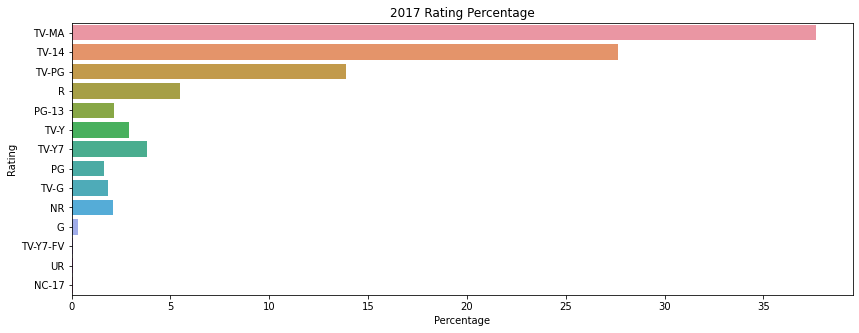

In [27]:
#create bar graph to show data comparison
values = percentage_ratings_2017['Percentage']
labels = percentage_ratings_2017['Rating']

plt.figure(figsize=(14,5))
g = sns.barplot(x=values, y=labels)
plt.title('2017 Rating Percentage')
plt.xlabel('Percentage')
plt.ylabel('Rating')
plt.savefig("images/2017_rating_percentages.png")
plt.show()

Breaking Down 2018

In [28]:
# find info for items added in 2018
netflix_info_2018 = netflix_info.loc[netflix_info["YEAR_added"]==2018]
netflix_info_2018 = pd.DataFrame(netflix_info_2018)
#netflix_info_2018.head()

In [29]:
#Find overall count of ratings for 2018
netflix_info_2018_ratings = netflix_info_2018['rating'].value_counts()
#netflix_info_2018_ratings

In [30]:
netflix_info_2018_tvma = netflix_info_2018.loc[netflix_info_2018["rating"]== 'TV-MA']
netflix_info_2018_tvma = pd.DataFrame(netflix_info_2018_tvma)

netflix_info_2018_tv14 = netflix_info_2018.loc[netflix_info_2018["rating"]== 'TV-14']
netflix_info_2018_tv14 = pd.DataFrame(netflix_info_2018_tv14)

netflix_info_2018_tvpg = netflix_info_2018.loc[netflix_info_2018["rating"]=='TV-PG']
netflix_info_2018_tvpg =pd.DataFrame(netflix_info_2018_tvpg)

netflix_info_2018_r = netflix_info_2018.loc[netflix_info_2018["rating"]=='R']
netflix_info_2018_r =pd.DataFrame(netflix_info_2018_r)

netflix_info_2018_pg13 = netflix_info_2018.loc[netflix_info_2018["rating"]=='PG-13']
netflix_info_2018_pg13 =pd.DataFrame(netflix_info_2018_pg13)

netflix_info_2018_tvy = netflix_info_2018.loc[netflix_info_2018["rating"]=='TV-Y']
netflix_info_2018_tvy =pd.DataFrame(netflix_info_2018_tvy)

netflix_info_2018_tvy7 = netflix_info_2018.loc[netflix_info_2018["rating"]=='TV-Y7']
netflix_info_2018_tvy7 =pd.DataFrame(netflix_info_2018_tvy7)

netflix_info_2018_pg = netflix_info_2018.loc[netflix_info_2018["rating"]=='PG']
netflix_info_2018_pg =pd.DataFrame(netflix_info_2018_pg)

netflix_info_2018_tvg = netflix_info_2018.loc[netflix_info_2018["rating"]=='TV-G']
netflix_info_2018_tvg =pd.DataFrame(netflix_info_2018_tvg)

netflix_info_2018_nr = netflix_info_2018.loc[netflix_info_2018["rating"]=='NR']
netflix_info_2018_nr =pd.DataFrame(netflix_info_2018_nr)

netflix_info_2018_g = netflix_info_2018.loc[netflix_info_2018["rating"]=='G']
netflix_info_2018_g =pd.DataFrame(netflix_info_2018_g)

netflix_info_2018_tvy7fv = netflix_info_2018.loc[netflix_info_2018["rating"]=='TV-Y7-FV']
netflix_info_2018_tvy7fv =pd.DataFrame(netflix_info_2018_tvy7fv)

netflix_info_2018_ur = netflix_info_2018.loc[netflix_info_2018["rating"]=='UR']
netflix_info_2018_ur =pd.DataFrame(netflix_info_2018_ur)

netflix_info_2018_nc17 = netflix_info_2018.loc[netflix_info_2018["rating"]=='NC-17']
netflix_info_2018_nc17 =pd.DataFrame(netflix_info_2018_nc17)


In [31]:
# find percentage of each rating
percent_tvma_2018 = len(netflix_info_2018_tvma) / len(netflix_info_2018) *100
percent_tv14_2018 = len(netflix_info_2018_tv14) / len(netflix_info_2018) *100
percent_tvpg_2018 = len(netflix_info_2018_tvpg) / len(netflix_info_2018) *100
percent_r_2018 = len(netflix_info_2018_r) / len(netflix_info_2018) *100
percent_pg13_2018 = len(netflix_info_2018_pg13) / len(netflix_info_2018) *100
percent_tvy_2018 = len(netflix_info_2018_tvy) / len(netflix_info_2018) *100
percent_tvy7_2018 = len(netflix_info_2018_tvy7) / len(netflix_info_2018) *100
percent_pg_2018 = len(netflix_info_2018_pg) / len(netflix_info_2018) *100
percent_tvg_2018 = len(netflix_info_2018_tvg) / len(netflix_info_2018) *100
percent_nr_2018 = len(netflix_info_2018_nr) / len(netflix_info_2018) *100
percent_g_2018 = len(netflix_info_2018_g) / len(netflix_info_2018) *100
percent_tvy7fv_2018 = len(netflix_info_2018_tvy7fv) / len(netflix_info_2018) *100
percent_ur_2018 = len(netflix_info_2018_ur) / len(netflix_info_2018) *100
percent_nc17_2018 = len(netflix_info_2018_nc17) / len(netflix_info_2018) *100


percentage_ratings_2018 = pd.DataFrame({ 'Rating': ['TV-MA', 'TV-14', 'TV-PG', 'R', 'PG-13', 'TV-Y', 'TV-Y7', 'PG',
                                                     'TV-G', 'NR', 'G', 'TV-Y7-FV', 'UR', 'NC-17'],
                                          'Percentage': [percent_tvma_2018, percent_tv14_2018, percent_tvpg_2018, percent_r_2018,
                                                         percent_pg13_2018, percent_tvy_2018, percent_tvy7_2018, percent_pg_2018,
                                                         percent_tvg_2018, percent_nr_2018, percent_g_2018, percent_tvy7fv_2018,
                                                         percent_ur_2018, percent_nc17_2018]})
#percentage_ratings_2018

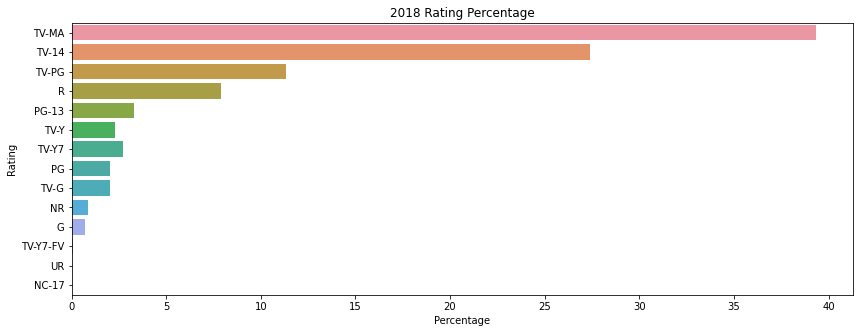

In [32]:
#create bar graph to show data comparison
values = percentage_ratings_2018['Percentage']
labels = percentage_ratings_2018['Rating']

plt.figure(figsize=(14,5))
g = sns.barplot(x=values, y=labels)
plt.title('2018 Rating Percentage')
plt.xlabel('Percentage')
plt.ylabel('Rating')
plt.savefig("images/2018_rating_percentages.png")
plt.show()

Breaking down 2019

In [33]:
# find info for items added in 2019
netflix_info_2019 = netflix_info.loc[netflix_info["YEAR_added"]==2019]
netflix_info_2019 = pd.DataFrame(netflix_info_2019)
#netflix_info_2019.head()

In [34]:
#Find overall count of ratings for 2019
netflix_info_2019_ratings = netflix_info_2019['rating'].value_counts()
#netflix_info_2019_ratings

In [35]:
netflix_info_2019_tvma = netflix_info_2019.loc[netflix_info_2019["rating"]== 'TV-MA']
netflix_info_2019_tvma = pd.DataFrame(netflix_info_2019_tvma)

netflix_info_2019_tv14 = netflix_info_2019.loc[netflix_info_2019["rating"]== 'TV-14']
netflix_info_2019_tv14 = pd.DataFrame(netflix_info_2019_tv14)

netflix_info_2019_tvpg = netflix_info_2019.loc[netflix_info_2019["rating"]=='TV-PG']
netflix_info_2019_tvpg =pd.DataFrame(netflix_info_2019_tvpg)

netflix_info_2019_r = netflix_info_2019.loc[netflix_info_2019["rating"]=='R']
netflix_info_2019_r =pd.DataFrame(netflix_info_2019_r)

netflix_info_2019_pg13 = netflix_info_2019.loc[netflix_info_2019["rating"]=='PG-13']
netflix_info_2019_pg13 =pd.DataFrame(netflix_info_2019_pg13)

netflix_info_2019_tvy = netflix_info_2019.loc[netflix_info_2019["rating"]=='TV-Y']
netflix_info_2019_tvy =pd.DataFrame(netflix_info_2019_tvy)

netflix_info_2019_tvy7 = netflix_info_2019.loc[netflix_info_2019["rating"]=='TV-Y7']
netflix_info_2019_tvy7 =pd.DataFrame(netflix_info_2019_tvy7)

netflix_info_2019_pg = netflix_info_2019.loc[netflix_info_2019["rating"]=='PG']
netflix_info_2019_pg =pd.DataFrame(netflix_info_2019_pg)

netflix_info_2019_tvg = netflix_info_2019.loc[netflix_info_2019["rating"]=='TV-G']
netflix_info_2019_tvg =pd.DataFrame(netflix_info_2019_tvg)

netflix_info_2019_nr = netflix_info_2019.loc[netflix_info_2019["rating"]=='NR']
netflix_info_2019_nr =pd.DataFrame(netflix_info_2019_nr)

netflix_info_2019_g = netflix_info_2019.loc[netflix_info_2019["rating"]=='G']
netflix_info_2019_g =pd.DataFrame(netflix_info_2019_g)

netflix_info_2019_tvy7fv = netflix_info_2019.loc[netflix_info_2019["rating"]=='TV-Y7-FV']
netflix_info_2019_tvy7fv =pd.DataFrame(netflix_info_2019_tvy7fv)

netflix_info_2019_ur = netflix_info_2019.loc[netflix_info_2019["rating"]=='UR']
netflix_info_2019_ur =pd.DataFrame(netflix_info_2019_ur)

netflix_info_2019_nc17 = netflix_info_2019.loc[netflix_info_2019["rating"]=='NC-17']
netflix_info_2019_nc17 =pd.DataFrame(netflix_info_2019_nc17)


In [36]:
# find percentage of each rating
percent_tvma_2019 = len(netflix_info_2019_tvma) / len(netflix_info_2019) *100
percent_tv14_2019 = len(netflix_info_2019_tv14) / len(netflix_info_2019) *100
percent_tvpg_2019 = len(netflix_info_2019_tvpg) / len(netflix_info_2019) *100
percent_r_2019 = len(netflix_info_2019_r) / len(netflix_info_2019) *100
percent_pg13_2019 = len(netflix_info_2019_pg13) / len(netflix_info_2019) *100
percent_tvy_2019 = len(netflix_info_2019_tvy) / len(netflix_info_2019) *100
percent_tvy7_2019 = len(netflix_info_2019_tvy7) / len(netflix_info_2019) *100
percent_pg_2019 = len(netflix_info_2019_pg) / len(netflix_info_2019) *100
percent_tvg_2019 = len(netflix_info_2019_tvg) / len(netflix_info_2019) *100
percent_nr_2019 = len(netflix_info_2019_nr) / len(netflix_info_2019) *100
percent_g_2019 = len(netflix_info_2019_g) / len(netflix_info_2019) *100
percent_tvy7fv_2019 = len(netflix_info_2019_tvy7fv) / len(netflix_info_2019) *100
percent_ur_2019 = len(netflix_info_2019_ur) / len(netflix_info_2019) *100
percent_nc17_2019 = len(netflix_info_2019_nc17) / len(netflix_info_2019) *100


percentage_ratings_2019 = pd.DataFrame({ 'Rating': ['TV-MA', 'TV-14', 'TV-PG', 'R', 'PG-13', 'TV-Y', 'TV-Y7', 'PG',
                                                     'TV-G', 'NR', 'G', 'TV-Y7-FV', 'UR', 'NC-17'],
                                          'Percentage': [percent_tvma_2019, percent_tv14_2019, percent_tvpg_2019, percent_r_2019,
                                                         percent_pg13_2019, percent_tvy_2019, percent_tvy7_2019, percent_pg_2019,
                                                         percent_tvg_2019, percent_nr_2019, percent_g_2019, percent_tvy7fv_2019,
                                                         percent_ur_2019, percent_nc17_2019]})
#percentage_ratings_2019

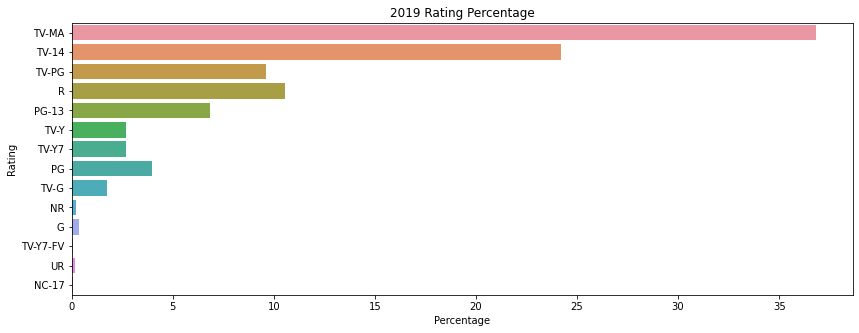

In [37]:
#create bar graph to show data comparison
values = percentage_ratings_2019['Percentage']
labels = percentage_ratings_2019['Rating']

plt.figure(figsize=(14,5))
g = sns.barplot(x=values, y=labels)
plt.title('2019 Rating Percentage')
plt.xlabel('Percentage')
plt.ylabel('Rating')
plt.savefig("images/2019_rating_percentages.png")
plt.show()

Breaking down 2020